In [33]:
#Social_Network_Ads.csv

**Importing the libraries**

In [34]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [35]:
data=pd.read_csv("https://raw.githubusercontent.com/Divyashanmugapriyan/Dataset/main/Social_Network_Ads.csv")

In [36]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [51]:
from sklearn import preprocessing
label_encode=preprocessing.LabelEncoder()

data["Gender"]=label_encode.fit_transform(data["Gender"])
data["Gender"].unique()

array([1, 0])

**Splitting the dataset into the Training set and Test set**

In [52]:
X=data.drop(columns=["User ID","Purchased"])
y=data["Purchased"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (320, 3) (320,)
Test set: (80, 3) (80,)


**Feature Scaling**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


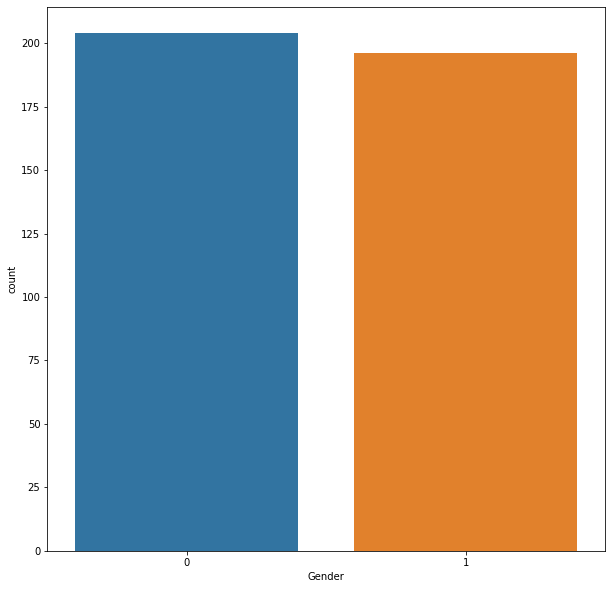

In [54]:
sns.countplot(data["Gender"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


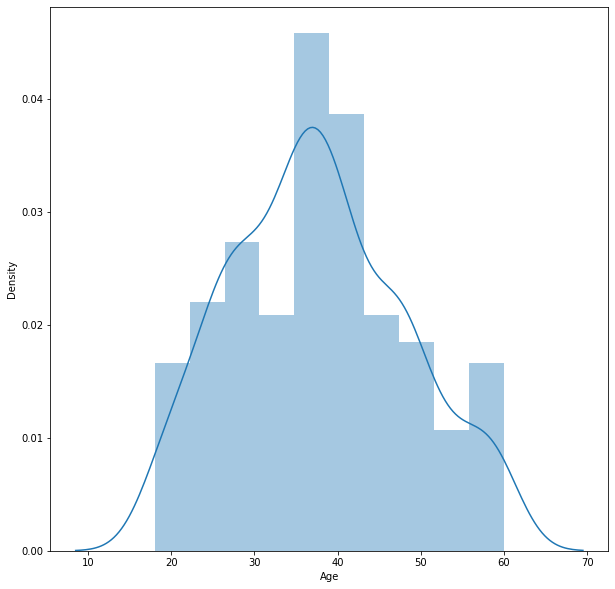

In [41]:

sns.distplot(data["Age"])

plt.show()

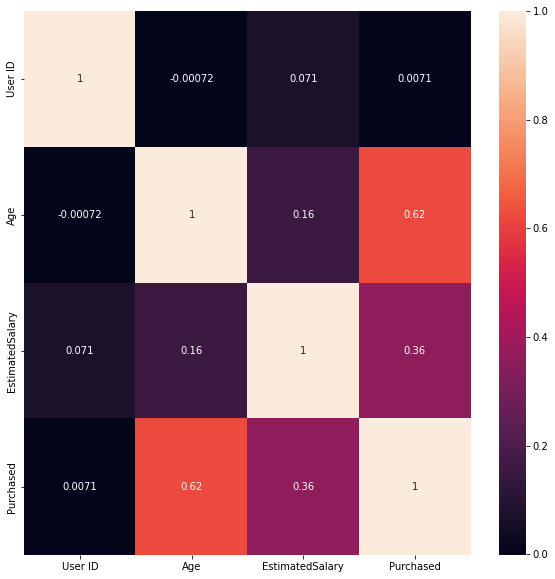

In [42]:
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(data.corr(),annot=True)

**Fitting Random Forest to the Training set**

In [55]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

**Predicting the Test set results**

In [56]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

**Making the Confusion Matrix**

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)


Predicted,0,1,All
Actual,,,
0,53,6,59
1,5,16,21
All,58,22,80


In [60]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91        59
           1       0.73      0.76      0.74        21

    accuracy                           0.86        80
   macro avg       0.82      0.83      0.83        80
weighted avg       0.86      0.86      0.86        80



**Visualising the Training set results**

In [61]:
training_score = model.score(X_train,y_train)*100
print("Train data score is :",training_score)

Train data score is : 99.6875


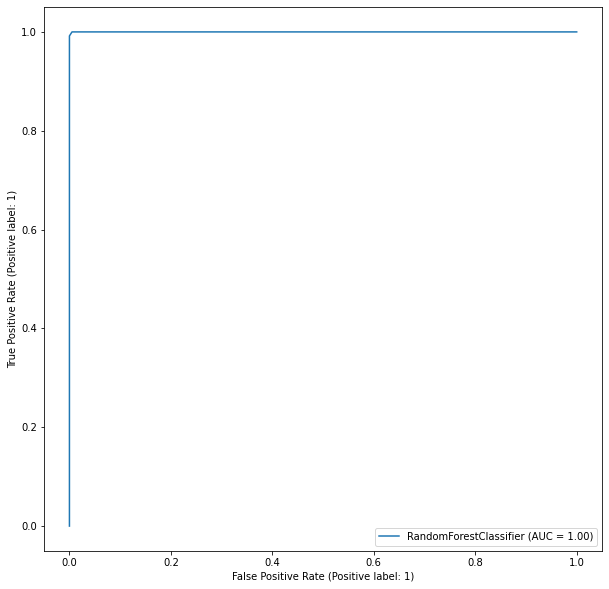

In [62]:
RocCurveDisplay.from_estimator(model,X_train,y_train)

In [64]:
xx=pd.DataFrame(X_test)
yy=pd.DataFrame(y_test)

**Visualising the Test set results**

In [65]:
test_score=accuracy_score(y_test,y_pred)*100
print("Test data score is :",test_score)

Test data score is : 86.25


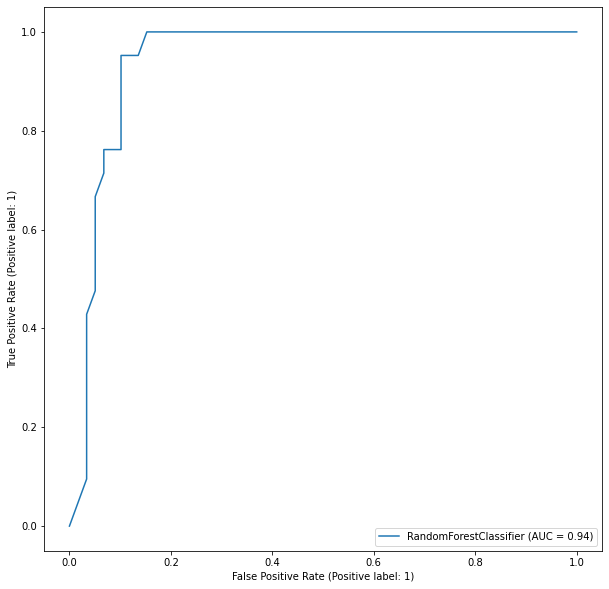

In [67]:
RocCurveDisplay.from_estimator(model,X_test,y_test)